# Fundamentals of Machine Learning

## Machine learning regression tasks

Importing modules

In [1]:
import numpy as np #linear algebra
import pandas as pd #dataframes
import sklearn.preprocessing #raw data preprocessing
import sklearn.model_selection #grid search + cross validation
import sklearn.ensemble #random forest
import sklearn.linear_model #linear regression
import sklearn.svm #support vector machines
import sklearn.neural_network #multilayer perceptron
import sklearn.neighbors #k-nearest neighbors
import sklearn.tree #decision tree
import matplotlib.pyplot as plt #visualization

Reading the data from a csv file and saving it into a dataframe

In [2]:
data = pd.read_csv('../data/exampleObesityClassReg.csv')

### Data Preprocessing

Data exploration

In [3]:
data.sample(10)

,country_name,continent,prevalence,tertile,RTDs/High-Strength Premixes,Processed Fruit and Vegetables,Processed Meat and Seafood,Ready Meals,"Rice, Pasta and Noodles","Sauces, Dressings and Condiments",...,Baby Food,Drinking Milk Products,Yoghurt and Sour Milk Products,Other Dairy,Ice Cream and Frozen Desserts,Cocoa Powder,Emulsifiers and Co-Emulsifiers,Fats and Oils,Flours,Milk
66,Slovenia,Europe,0.263871,3,2454.966667,7337.333333,11419.266670,2031.900000,10990.766670,6365.633333,...,1059.166667,75184.000000,13103.766670,7001.166667,3239.900000,228.366667,353.100000,17559.200000,45317.53333,99504.333330
67,New Zealand,Oceania,0.269757,3,13807.166670,27303.333330,13120.166670,6621.033333,9497.566667,10763.433330,...,1018.166667,114335.400000,6150.566667,5392.400000,13494.666670,277.633333,369.966667,19198.366670,32005.36667,132800.966700
19,Peru,America,0.162371,1,110.533333,468.366667,1436.366667,12.333333,14236.933330,1000.733333,...,106.900000,8222.166667,3489.300000,14369.966670,793.566667,142.766667,125.500000,11110.833330,27759.66667,17815.166670
47,Ecuador,America,0.218376,2,133.766667,1851.133333,3227.966667,80.900000,9029.400000,1463.800000,...,419.533333,32145.366670,3687.333333,213.566667,1191.166667,83.100000,130.000000,6213.000000,20808.06667,36225.666670
4,Indonesia,Asia,0.046816,1,22.000000,150.466667,506.800000,3.166667,33005.633330,3054.800000,...,644.566667,1489.100000,276.300000,1462.966667,403.800000,79.166667,27.633333,5130.233333,6929.60000,2969.766667
7,Singapore,Asia,0.063294,1,72.133333,6534.000000,5255.333333,889.400000,42256.300000,5492.866667,...,1150.800000,21579.500000,2841.200000,4714.166667,4760.966667,280.533333,134.433333,14444.633330,17122.06667,26384.000000
2,Japan,Asia,0.044837,1,4773.366667,7882.000000,31266.500000,11406.533330,51489.866670,28564.600000,...,366.500000,33589.800000,9963.800000,1775.833333,5336.266667,259.100000,273.933333,14994.766670,26887.76667,47567.500000
60,Costa Rica,America,0.244195,3,1319.866667,2526.900000,9112.666667,92.700000,58279.066670,3943.833333,...,496.300000,32771.833330,2410.600000,3623.800000,2308.833333,167.400000,224.200000,13888.966670,21025.70000,39003.466670
72,Venezuela (Bolivarian Republic of),America,0.306261,3,927.866667,3237.066667,4561.000000,231.966667,32886.966670,4903.833333,...,1441.566667,15388.100000,1643.000000,561.166667,1493.133333,117.133333,217.100000,14898.066670,28510.26667,21720.800000
68,Czech Republic,Europe,0.279309,3,410.500000,8943.833333,17111.433330,1814.266667,12743.133330,11062.400000,...,1141.233333,42347.366670,13655.966670,9601.600000,3062.000000,215.466667,511.833333,21927.366670,62208.33333,70163.766670


Describing the prevalence

In [4]:
data.prevalence.describe()

count    79.000000
mean      0.195593
std       0.080271
min       0.016048
25%       0.163696
50%       0.206130
75%       0.241439
max       0.353288
Name: prevalence, dtype: float64

Exploring the distribution of the labels

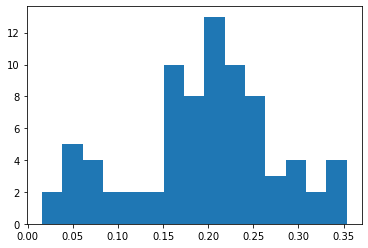

In [5]:
plt.hist(data.prevalence,bins=15)
plt.show()

Describing the shape of the dataframe

In [6]:
data.shape

(79, 52)

Creating a variable which only contains the predictor features

In [7]:
features = data[data.columns.difference(['prevalence','tertile','country_name','continent'])]

Saving the feature names into a variable

In [8]:
feature_names = features.columns

Visualizing the features

In [9]:
features.sample(3)

,Baby Food,Baked Goods,Beer,Bottled Water,Breakfast Cereals,Butter and Margarine,Carbonates,Cheese,Chocolate Confectionery,Cocoa Powder,...,Sports and Energy Drinks,Spreads,Starchy Roots,Sugar Confectionery,Sugar and Sweeteners,"Sweet Biscuits, Snack Bars and Fruit Snacks",Tea,Vegetables,Wine,Yoghurt and Sour Milk Products
3,52.933333,3054.50000,11499.10000,5467.833333,174.033333,8216.500000,7951.10000,6.566667,43.166667,10.300000,...,33.066667,23.966667,3440.0000,112.366667,3960.833333,251.266667,509.633333,5028.533333,453.4000,512.733333
48,1079.366667,75819.73333,86080.56667,56575.100000,914.300000,8065.400000,47497.36667,4340.366667,4391.533333,160.133333,...,1532.466667,1540.033333,100107.3667,1200.066667,21013.466670,3129.766667,637.866667,116465.700000,6158.6667,10295.366670
44,1782.366667,54447.93333,60562.20000,98986.766670,2549.833333,6588.466667,46943.43333,11008.100000,1567.433333,329.933333,...,896.033333,1203.800000,31282.0000,1118.733333,6496.166667,5623.900000,53.900000,101521.033300,47800.1333,17166.233330


Creating a variable of the numerical labels of the dataset

In [10]:
labels_numerical = data.prevalence

Normalizing the numerical variables into a min max scaler where the maximum value is transformed into a 1 and the minimum value is 0

In [11]:
minMaxScaler = sklearn.preprocessing.MinMaxScaler()
features = minMaxScaler.fit_transform(features)

Checking if the range of the values is between 0 and 1

In [12]:
features[:1,:]

array([[1.03185572e-01, 1.33818127e-03, 1.09283215e-01, 1.49233599e-02,
        0.00000000e+00, 3.05246906e-03, 1.69307795e-02, 1.84287043e-03,
        3.35912234e-03, 3.22430631e-02, 6.25161770e-02, 1.95383271e-04,
        2.40807285e-02, 1.34124650e-01, 8.86528758e-02, 1.42828672e-03,
        9.25111471e-02, 2.12577881e-01, 1.51973811e-02, 3.83042097e-01,
        1.02277989e-01, 1.04349473e-02, 8.94231364e-03, 3.92787984e-01,
        2.35873654e-02, 8.23362026e-01, 4.57720111e-02, 1.29546406e-02,
        1.79410705e-03, 1.01928756e-02, 1.15803603e-01, 0.00000000e+00,
        3.52686069e-03, 5.51678163e-02, 1.21884279e-01, 3.08558548e-02,
        0.00000000e+00, 8.63255982e-03, 8.28225925e-02, 0.00000000e+00,
        3.55299793e-01, 5.99909253e-02, 1.22368333e-01, 3.11179893e-02,
        5.75844010e-02, 6.57770121e-01, 6.06134921e-03, 2.39244174e-02]])

Splitting the data into training and testing subsets

In [13]:
features_train, features_test, labels_numerical_train, labels_numerical_test = sklearn.model_selection.train_test_split(
    features,
    labels_numerical,
    test_size=0.30,
    random_state = 55
)

In [14]:
features_train

array([[3.10005874e-02, 1.98881520e-01, 3.32067154e-02, ...,
        1.42468362e-01, 1.20271631e-02, 1.56250255e-01],
       [5.87793249e-02, 5.59400214e-01, 4.36056485e-01, ...,
        9.76227321e-01, 1.39791102e-01, 4.99897972e-01],
       [4.12362229e-02, 5.49619709e-02, 2.59055740e-01, ...,
        1.55432033e-01, 1.23388777e-02, 1.46251479e-02],
       ...,
       [3.42880835e-01, 3.97060010e-01, 5.14808573e-01, ...,
        2.50535117e-01, 4.33482751e-01, 3.20884790e-01],
       [8.27315759e-02, 6.62700246e-01, 1.37732071e-02, ...,
        5.41375111e-01, 2.70145690e-02, 1.88936049e-01],
       [2.40299900e-02, 4.09165363e-01, 7.62634182e-03, ...,
        8.41336885e-01, 9.33748442e-04, 7.06493082e-02]])

### Machine Learning Data Analysis

Training a linear regression model

In [15]:
regressor = sklearn.linear_model.LinearRegression()

In [16]:
regressor.fit(features_train,labels_numerical_train)

LinearRegression()

Printing the coefficients of each feature

In [17]:
regressor.coef_

array([ 0.16677324, -0.35906334,  0.03765829, -0.00785051, -0.04918158,
        0.06337703,  0.16007784, -0.18941514,  0.06405334, -0.30994365,
       -0.070123  , -0.07786633, -0.52686665, -0.16103048, -0.10058087,
        0.04266822,  0.31223977,  0.01970688,  0.24363222, -0.21940706,
        0.00305268,  0.0564445 , -0.05077532,  0.25046921,  0.85479572,
       -0.14173477, -0.04803398, -0.0340297 , -0.36134998,  0.14881112,
        0.44305301, -0.10840107, -0.07486004, -0.02140524, -0.03044997,
        0.04409911,  0.32655928, -0.05034695, -0.05027414,  0.08651873,
       -0.13958739,  0.12765063, -0.00630166, -0.12305165,  0.08047724,
       -0.04569768,  0.18668161, -0.27430608])

Printing the intercept of the linear model

In [18]:
regressor.intercept_

0.124519239066125

Making predictions over the testing subset

In [19]:
predictions = regressor.predict(features_test)

In [20]:
pd.DataFrame(list(zip(labels_numerical_test,predictions)),columns=['true','predicted']).sample(5)

,true,predicted
21,0.263871,0.270861
22,0.245770,0.498653
12,0.169666,0.098764
13,0.353288,0.132477
5,0.054962,-0.107278


Calculating the mean absolute error (MAE)
$$MAE = \frac{1}{n}\sum_{i=1}^{n}\left | y_{i} - \hat{y}_{i} \right |$$

In [21]:
sklearn.metrics.mean_absolute_error(labels_numerical_test,predictions)

0.12506414047167172

Calculating the root mean squared error
$$RMSE = \sqrt {\frac{1}{n}\sum_{j=1}^{n}\left ( y_{i} - \hat{y}_{i} \right )^{2}}$$

In [22]:
sklearn.metrics.mean_squared_error(labels_numerical_test,predictions)**0.5

0.1515130610958789

Calculating the r-squared statistic

In [23]:
sklearn.metrics.r2_score(labels_numerical_test,predictions)

-1.8306388392558417

### Random Forest Regressor

Training a random forest regressor with 100 trees

In [24]:
regressor = sklearn.ensemble.RandomForestRegressor(n_estimators=100, random_state=15)

In [25]:
regressor.fit(features_train,labels_numerical_train)

RandomForestRegressor(random_state=15)

Predicting the labels from the test features subset

In [26]:
predictions = regressor.predict(features_test)

In [27]:
summary = pd.DataFrame(list(zip(data.country_name,labels_numerical_test,predictions)),columns=['country','true','predicted'])
summary['AE'] = abs(summary.true - summary.predicted)
summary = summary.sort_values(by='AE',ascending=True)

Calculating MAE

In [28]:
sklearn.metrics.mean_absolute_error(labels_numerical_test,predictions)

0.04739467970833331

Calculating RMSE

In [29]:
sklearn.metrics.mean_squared_error(labels_numerical_test,predictions)**0.5

0.0623159277148924

Calculating r-squared

In [30]:
sklearn.metrics.r2_score(labels_numerical_test,predictions)

0.5211687941975336

Exploring the absolute errors by country that are in the testing dataset

In [31]:
summary

,country,true,predicted,AE
11,Taiwan,0.083790,0.083671,0.000119
6,Pakistan,0.254970,0.252866,0.002104
22,Uzbekistan,0.245770,0.249052,0.003282
7,Singapore,0.212405,0.220360,0.007955
2,Japan,0.241884,0.253848,0.011964
4,Indonesia,0.046816,0.063987,0.017170
15,Malaysia,0.240199,0.219912,0.020287
1,India,0.070481,0.100898,0.030417
9,Nigeria,0.165021,0.196188,0.031167
10,Republic of Korea,0.197482,0.231662,0.034180


Plotting the absolute errors by country, sorted by absolute error

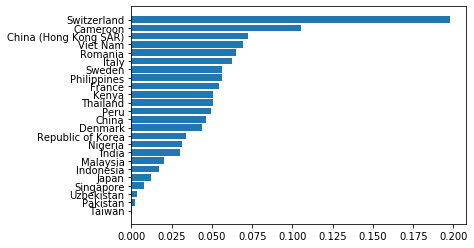

In [32]:
plt.barh(summary.country,summary.AE)
plt.show()

Extracting the variable importance list from the random forest regressor

In [33]:
vil = pd.DataFrame(list(zip(feature_names,regressor.feature_importances_)),
                   columns=['feature','mean_gini_decrease']
                  ).sort_values(by='mean_gini_decrease', ascending=False)

In [34]:
vil.head()

,feature,mean_gini_decrease
18,Flours,0.216964
1,Baked Goods,0.198272
30,Pulses,0.095289
25,Nuts,0.077591
10,Coffee,0.055990


Plotting the variable importance list sorted by the mean decrease gini

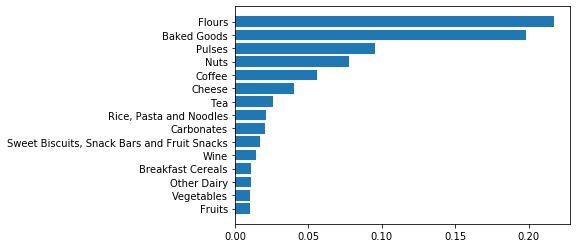

In [35]:
ax = plt.barh(data = vil.sort_values(by='mean_gini_decrease').tail(15), 
         y='feature', 
         width = 'mean_gini_decrease'
        )
plt.show()

Averaging the VIL from 50 random forest runs

In [36]:
rf_vil  = []
for i in range(50):
    rf = sklearn.ensemble.RandomForestRegressor(n_estimators=100)
    rf = rf.fit(features_train,labels_numerical_train)
    rf_vil.append(rf.feature_importances_)
mean_vil = np.mean(rf_vil, axis = 0)

In [37]:
mean_vil = pd.DataFrame(list(zip(feature_names,mean_vil)),
                   columns=['feature','mean_gini_decrease']
                  ).sort_values(by='mean_gini_decrease', ascending=False)

In [38]:
mean_vil.head()

,feature,mean_gini_decrease
1,Baked Goods,0.215636
18,Flours,0.161095
25,Nuts,0.106673
30,Pulses,0.091637
10,Coffee,0.052631


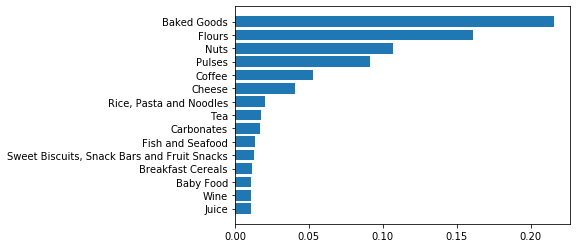

In [39]:
ax = plt.barh(data = mean_vil.sort_values(by='mean_gini_decrease').tail(15), 
         y='feature', 
         width = 'mean_gini_decrease'
        )
plt.show()

### Constructing a cross-validated estimator to predict over all countries

In [40]:
regressor = sklearn.ensemble.RandomForestRegressor(n_estimators=100, random_state=15)

Training a estimator using the entire dataset but using cross validation to empower the generalization

In [41]:
predictions = sklearn.model_selection.cross_val_predict(regressor, features, labels_numerical)

In [42]:
summary = pd.DataFrame(list(zip(data.country_name,labels_numerical,predictions)),columns=['country','true','predicted'])
summary['AE'] = abs(summary.true - summary.predicted)
summary = summary.sort_values(by='AE',ascending=True)

In [43]:
summary

,country,true,predicted,AE
48,Poland,0.227263,0.227680,0.000417
45,Latvia,0.214695,0.214054,0.000641
41,Georgia,0.209004,0.207275,0.001729
52,Kazakhstan,0.236503,0.232895,0.003608
50,Uruguay,0.234356,0.238608,0.004252
...,...,...,...,...
8,Philippines,0.064357,0.258662,0.194304
2,Japan,0.044837,0.244146,0.199309
4,Indonesia,0.046816,0.258592,0.211776
0,Viet Nam,0.016048,0.232403,0.216355


Plotting the absolute errors by country, sorted by absolute error

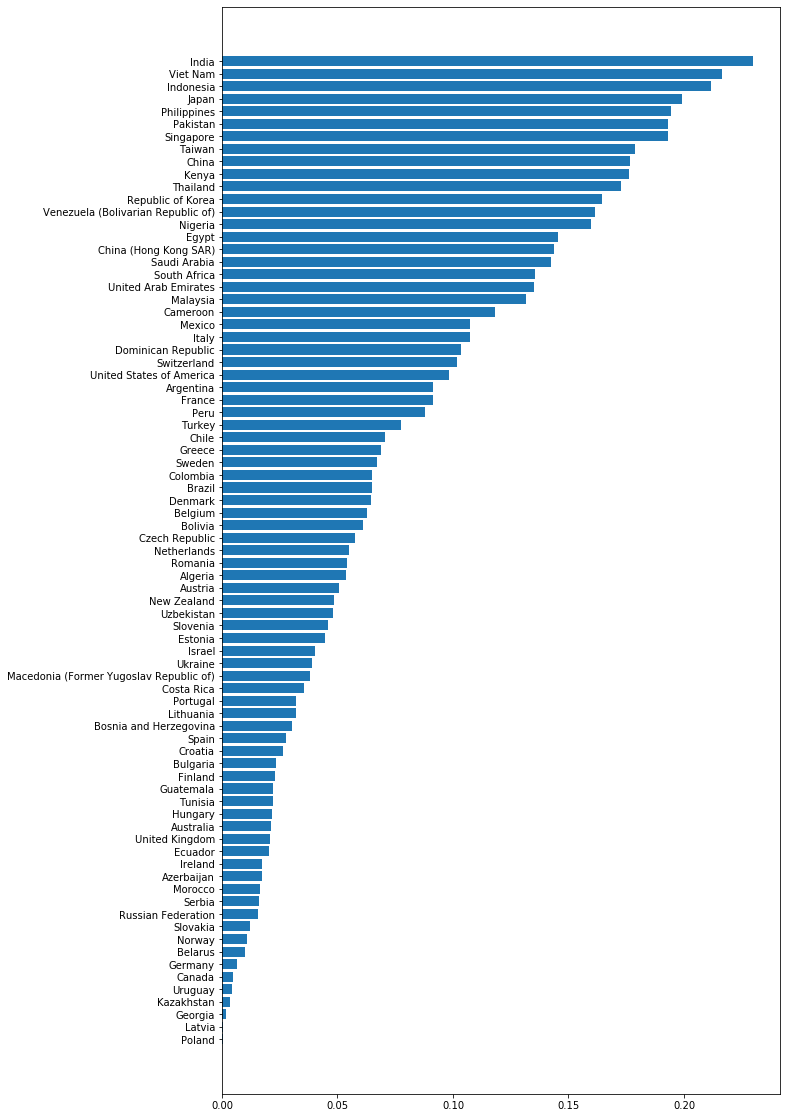

In [44]:
plt.figure(figsize=(10,20))
plt.barh(summary.country,summary.AE)
plt.show()

### Comparison Between Diferent Machine Learning Models and Hyperparameters

Selecting some machine learning training algorithms, training each one and using cross validation to retrieve their performance

In [45]:
models = []

models.append(("LinearRegression",sklearn.linear_model.LinearRegression()))
models.append(("SVR",sklearn.svm.SVR()))
models.append(("RandomForest",sklearn.ensemble.RandomForestRegressor()))
models.append(("KNeighbors",sklearn.neighbors.KNeighborsRegressor()))
models.append(("MLPRegressor",sklearn.neural_network.MLPRegressor()))
models.append(("DecisionTreeRegressor",sklearn.tree.DecisionTreeRegressor()))


results = []
names = []
for name,model in models:
    result = sklearn.model_selection.cross_val_score(model, 
                             features, 
                             labels_numerical,  
                             cv=10, 
                             scoring='neg_mean_absolute_error',
                             n_jobs=-1
                            )
    names.append(name)
    results.append(result)

List of compared models along with their hyperparameters

In [46]:
models

[('LinearRegression', LinearRegression()),
 ('SVR', SVR()),
 ('RandomForest', RandomForestRegressor()),
 ('KNeighbors', KNeighborsRegressor()),
 ('MLPRegressor', MLPRegressor()),
 ('DecisionTreeRegressor', DecisionTreeRegressor())]

Box plot of the results (negative mean absolute error) of each model

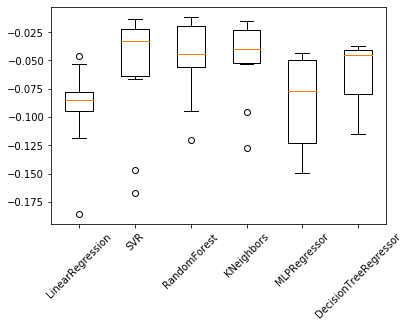

In [47]:
plt.boxplot(results,labels = names)
plt.xticks(rotation=45)
plt.show()

In [48]:
##########

#compare the models based on other metric

##########

Grid search for selection of the best hyperparameters

In [49]:
# # HIGH PROCESSOR INTENSIVE TASK (~5 minutes calculations of a 12 cores machine)

# parameters = {'n_estimators': list(range(260,360,20)),
#               'max_features': ['auto', 'sqrt'],
#               'max_depth': list(range(20,100,20))+[None],
#               'min_samples_split': [2, 5, 10],
#               'min_samples_leaf': [1, 2, 4],
#               'bootstrap': [True, False]
# }
# grid_Search = sklearn.model_selection.GridSearchCV(sklearn.ensemble.RandomForestRegressor(), 
#                                                    parameters, 
#                                                    n_jobs=-1,
#                                                    cv = 3,
#                                                    scoring = 'neg_mean_squared_error'
#                                                   )

# grid_Search.fit(features_train,labels_numerical_train)

In [50]:
#low intensive grid search
parameters = {'n_estimators': [100,150,200]
}
grid_Search = sklearn.model_selection.GridSearchCV(sklearn.ensemble.RandomForestRegressor(), 
                                                   parameters, 
                                                   n_jobs=-1,
                                                   cv = 3,
                                                   scoring = 'neg_mean_absolute_error'
                                                  )

grid_Search.fit(features_train,labels_numerical_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'n_estimators': [100, 150, 200]},
             scoring='neg_mean_absolute_error')

The best hyperparameters extracted from the grid search

In [51]:
grid_Search.best_params_

{'n_estimators': 100}

The result of each run of the grid search

In [52]:
pd.DataFrame(grid_Search.cv_results_).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.167886,0.00418,0.006981,0.001410,100,{'n_estimators': 100},-0.035567,-0.055627,-0.039504,-0.043566,0.008679,1
1,0.227063,0.00094,0.010306,0.000470,150,{'n_estimators': 150},-0.038044,-0.056678,-0.041926,-0.045550,0.008027,3
2,0.284702,0.00663,0.009571,0.000917,200,{'n_estimators': 200},-0.034219,-0.056269,-0.041923,-0.044137,0.009137,2


Making predictions over the test subset using the best model from the grid search

In [53]:
predictions = grid_Search.predict(features_test)

Summary of the results

In [54]:
pd.DataFrame(list(zip(labels_numerical_test,predictions)),columns=['true','predicted']).sample(5)

,true,predicted
3,0.059085,0.143378
17,0.172390,0.241560
16,0.044837,0.240686
11,0.083790,0.077922
13,0.353288,0.255823


MAE

In [55]:
sklearn.metrics.mean_absolute_error(labels_numerical_test,predictions)

0.050221454666666644

RMSE

In [56]:
sklearn.metrics.mean_squared_error(labels_numerical_test,predictions)**0.5

0.06488867371411475

R-squared

In [57]:
sklearn.metrics.r2_score(labels_numerical_test,predictions)

0.48081503024635486

In [58]:
##########

#make your own grid search for other training algorithm

##########